In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from numba import jit

In [2]:
start = time.time()

In [3]:
history = 300 #specify the number of particles
radius = 5
r = np.full((history, 2), np.nan)

@jit(nopython=True)
def initialize_particles(r, history):
    for i in range(history):
        teta = np.random.uniform(0, 2*np.pi)
        position = np.random.uniform(0, radius)
        r[i, 0] = position * np.cos(teta)
        r[i, 1] = position * np.sin(teta)

In [4]:
initialize_particles(r, history)

In [5]:
r

array([[ 3.73975277e+00,  2.85895131e+00],
       [ 2.00384788e+00, -2.83030675e-01],
       [ 6.93858582e-02, -3.03211936e-01],
       [ 1.72180371e+00, -2.01214598e+00],
       [-1.36013022e+00,  9.94586073e-01],
       [-2.66737482e+00,  1.22291888e+00],
       [ 7.19046833e-01, -1.15189624e+00],
       [-6.06726468e-01,  1.11097880e+00],
       [ 2.06652524e+00, -4.12643955e+00],
       [ 7.70396172e-01, -1.73646721e+00],
       [ 1.70163193e-01, -1.25489471e+00],
       [ 2.22783932e+00,  5.96634530e-01],
       [ 3.16989058e+00,  3.53054703e+00],
       [ 1.77274891e+00, -5.97231478e-01],
       [ 2.74061509e+00,  3.96649126e+00],
       [ 1.05503699e-01,  4.82625355e+00],
       [ 7.68957740e-01,  2.33093058e+00],
       [-9.49370691e-01, -7.37797309e-01],
       [ 1.49985563e+00, -2.33491554e+00],
       [ 6.22092173e-01,  8.84339470e-01],
       [-2.47893513e-01,  3.80927969e+00],
       [ 2.01615414e-01, -9.16523784e-01],
       [-1.44411533e+00,  5.61018539e-01],
       [-3.

In [6]:
fps = 20
dt = 1/fps
final_time = 200
steps = int(final_time/dt)

In [7]:
record = np.full((steps, history, 2), np.nan)
record[0,:,:] = r[:,:]
init_record = record

In [8]:
init_record

array([[[ 3.73975277,  2.85895131],
        [ 2.00384788, -0.28303068],
        [ 0.06938586, -0.30321194],
        ...,
        [-3.36885715,  3.64409538],
        [ 1.4510208 ,  0.49184504],
        [ 1.72052091, -0.06791475]],

       [[        nan,         nan],
        [        nan,         nan],
        [        nan,         nan],
        ...,
        [        nan,         nan],
        [        nan,         nan],
        [        nan,         nan]],

       [[        nan,         nan],
        [        nan,         nan],
        [        nan,         nan],
        ...,
        [        nan,         nan],
        [        nan,         nan],
        [        nan,         nan]],

       ...,

       [[        nan,         nan],
        [        nan,         nan],
        [        nan,         nan],
        ...,
        [        nan,         nan],
        [        nan,         nan],
        [        nan,         nan]],

       [[        nan,         nan],
        [        nan,      

In [9]:
fr = 1
fuel = np.full((1, 2), np.nan)

@jit(nopython=True)
def initialize_fuel(fuel):
    fuel[0, 0] = 0
    fuel[0, 1] = 0

In [10]:
initialize_fuel(fuel)

In [11]:
fuel

array([[0., 0.]])

In [12]:
speed = 1
v = np.full((history, 2), np.nan)

@jit(nopython=True)
def initialize_speed(v, history):
    for i in range(history):
        teta = np.random.uniform(0, 2*np.pi)
        v[i, 0] = speed * np.cos(teta)
        v[i, 1] = speed * np.sin(teta)

In [13]:
initialize_speed(v, history)

In [14]:
v

array([[-0.88381537, -0.46783586],
       [-0.66197645, -0.74952464],
       [-0.66186153, -0.74962612],
       [ 0.98672917, -0.16237471],
       [-0.40563164, -0.91403663],
       [-0.77605749, -0.63066217],
       [-0.36778694, -0.92991008],
       [-0.84461533,  0.53537364],
       [-0.01256243,  0.99992109],
       [ 0.9700226 ,  0.24301471],
       [ 0.95234008, -0.3050383 ],
       [-0.97002646, -0.24299931],
       [ 0.73841969, -0.67434143],
       [-0.47018066, -0.8825702 ],
       [ 0.83251333, -0.55400502],
       [-0.5072451 , -0.86180184],
       [-0.10175164, -0.99480983],
       [ 0.52309265, -0.85227582],
       [ 0.67005742,  0.74230927],
       [-0.0446415 ,  0.99900307],
       [-0.76687083, -0.64180147],
       [-0.04302876, -0.99907383],
       [ 0.64626099, -0.76311646],
       [-0.34865132, -0.93725251],
       [-0.51370939, -0.85796426],
       [-0.99448513,  0.10487768],
       [ 0.48952094,  0.87199154],
       [ 0.42894658,  0.90332986],
       [-0.94269381,

In [15]:
@jit(nopython=True)
def update_particle(steps, history, r, v, fuel, fr, record, init_record):
    for i in range(1, steps):
        for j in range(history):
            if r[j, 0] == 11000:
                continue
            elif (fuel[0, 0] - fr <= r[j, 0] <= fuel[0, 0] + fr and
                  fuel[0, 1] - fr <= r[j, 1] <= fuel[0, 1] + fr and
                  np.sqrt(r[j, 0]**2 + r[j, 1]**2) <= fr):
                r[j,:] = 11000
                v[j,:] = 0
                r2 = np.full((2, 2), np.nan)
                initialize_particles(r2, 2)
                v2 = np.full((2, 2), np.nan)
                initialize_speed(v2, 2)
                r = np.concatenate((r, r2), axis=0)
                v = np.concatenate((v, v2), axis=0)
                history += 2
                record = np.full((steps, history, 2), np.nan)
                record[:, :history-2, :] = init_record
                init_record = record
                continue
            elif np.sqrt(r[j, 0]**2 + r[j, 1]**2) < radius:
                r[j, :] = r[j, :] + v[j, :] * dt
                continue
            else:
                distance_to_origin = np.sqrt(r[j, 0]**2 + r[j, 1]**2)
                normal_vector = np.array([r[j, 0], r[j, 1]]) / distance_to_origin
                dot_product = np.dot(np.array([v[j, 0], v[j, 1]]), normal_vector)
                v[j, 0] -= 2 * dot_product * normal_vector[0]
                v[j, 1] -= 2 * dot_product * normal_vector[1]
                r[j, :] = r[j, :] + v[j, :] * dt
        record[i,:,:] = r[:,:]
        init_record = record
    return record

In [16]:
record = update_particle(steps, history, r, v, fuel, fr, record, init_record)

In [17]:
end = time.time()
print(f'duration = {end-start}')

duration = 58.867473125457764


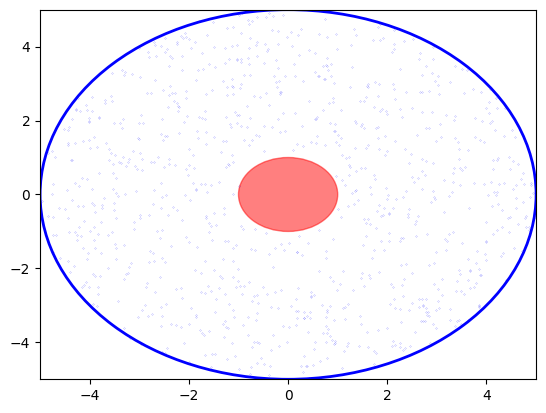

In [18]:
# Create a figure and axis for the animation
fig, ax = plt.subplots()
ax.set_xlim(-radius, radius)
ax.set_ylim(-radius, radius)

# Create a scatter plot for the particles with a specified size (e.g., ms=2)
particles, = ax.plot([], [], 'bo', ms=0.1)

# Create cylinder boundary
cylinder = plt.Circle((0, 0), radius, color='b', fill=False, lw=2)
ax.add_patch(cylinder)

# Create fuel region
fuel_region = plt.Circle((0, 0), fr, color='red', alpha=0.5)
ax.add_patch(fuel_region)

# Function to initialize the plot
def init():
    particles.set_data([], [])
    return particles,

# Function to update particle positions for each frame
def update(frame):
    x_data = record[frame,:,0].copy()
    y_data = record[frame,:,1].copy()
    particles.set_data(x_data, y_data)
    return particles,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(record), init_func=init, interval=50, blit=True)

# Set up the animation writer (for saving as a GIF)
Writer = animation.writers['pillow']
writer = Writer(fps=fps, metadata=dict(artist='Me'), bitrate=1800)

# Save the animation as a GIF
ani.save('particle_animation.gif', writer=writer)

# Display the animation
plt.show()
